# Logistic Regression

### TODO: Def

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sns.set_style("whitegrid")

### Importing the dataset

In [14]:
dataset = pd.read_csv('./filez/Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


### Splitting the dataset into Train/Test sets

In [15]:
from sklearn.model_selection import train_test_split

X = dataset.drop("Purchased", axis=1)
y = dataset["Purchased"]

# 0.2 is reco, but setting to .25 to have round nums (300 train, 100 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

In [16]:
X_test.head()

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000


In [17]:
y_test.head()

132    0
309    0
341    0
196    0
246    0
Name: Purchased, dtype: int64

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Logistic Regression model on the Training set

In [19]:
from sklearn.linear_model import LogisticRegression

# param `C` is the most popular for fine-tunning 
classifier = LogisticRegression(max_iter=1000, random_state=0)
classifier.fit(X_train, y_train)
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Predicting a new result

In [20]:
def make_prediction(age: int, salary: int):
    new_data = pd.DataFrame([[age, salary]], columns=['Age', 'EstimatedSalary'])
    new_pred = classifier.predict(sc.transform(new_data))
    print(f"new prediction for age: {age} & salary: ${salary:,} -> {new_pred[0]}")

make_prediction(19, 19000)
make_prediction(32, 150000)


new prediction for age: 19 & salary: $19,000 -> 0
new prediction for age: 32 & salary: $150,000 -> 1


### Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)
y_test = np.array(y_test)
# show first 10 records
print(
    np.concatenate(
        (y_pred.reshape(len(y_pred), 1)[:10], y_test.reshape(len(y_test), 1)[:10]),
        axis=1,
    ),
    "...",
)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]] ...


### Visualizing predictions on Test set

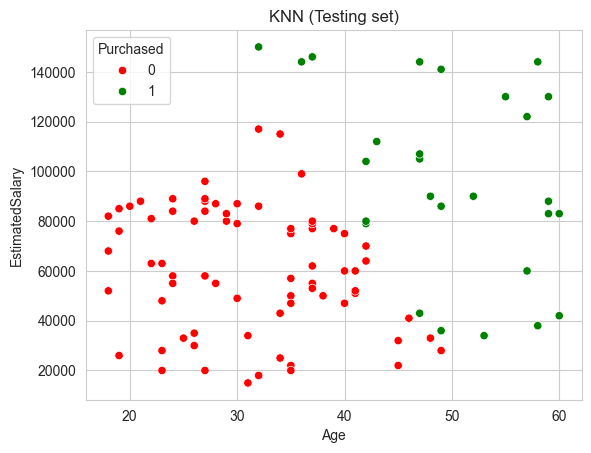

In [22]:
# Reverse the scaling of the test set
X_test_inv = sc.inverse_transform(X_test)

# Convert the scaled test set back to a DataFrame
X_test_inv_df = pd.DataFrame(X_test_inv, columns=["Age", "EstimatedSalary"])

# Add the predictions to this DataFrame
y_pred = classifier.predict(X_test)
X_test_inv_df["Purchased"] = y_pred

# Show the scatter plot
sns.scatterplot(
    data=X_test_inv_df,
    x="Age",
    y="EstimatedSalary",
    hue="Purchased",
    palette={0: "red", 1: "green"},
)
plt.title("KNN (Testing set)")
plt.show()

### Visualizing predictions on Test set with decision boundary

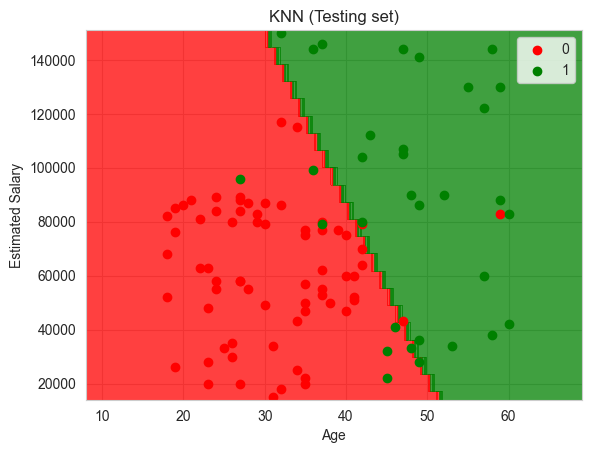

In [24]:
# Convert X_test back to a DataFrame with column names if it's not already
X_test_df = pd.DataFrame(X_test, columns=["Age", "EstimatedSalary"])

# Reverse the scaling of the test set
X_set, y_set = sc.inverse_transform(X_test_df), y_test

# Create the meshgrid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1),
)

# Prepare the meshgrid as DataFrame for transformation
mesh_df = pd.DataFrame(
    np.c_[X1.ravel(), X2.ravel()], columns=["Age", "EstimatedSalary"]
)

# Predict on the transformed meshgrid
Z = classifier.predict(sc.transform(mesh_df)).reshape(X1.shape)

# Plot the decision regions
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(("red", "green")))

# Define colors for each class
colors = ["red", "green"]

# Scatter plot of the actual test data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=colors[i], label=j)

plt.title("KNN (Testing set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

### Evaluating the Model


In [23]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"1) classification_report:\n\n", classification_report(y_test, y_pred))
print(f"2) confusion_matrix:\n\n", confusion_matrix(y_test, y_pred), "\n")
print(f"3) accuracy_score:\n\n", accuracy_score(y_test, y_pred))

1) classification_report:

               precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

2) confusion_matrix:

 [[65  3]
 [ 8 24]] 

3) accuracy_score:

 0.89


    Correct predictions
    - 65 didn't
    - 24 did

    Incorrect predictions:
    - 3 didn't (but did)
    - 8 did (but didn't)

    89% of correct predictions